In [22]:
# import necessary libraries like numpy, pandas, pyplot and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# reading dataset
chronic_df = pd.read_csv('/content/chronic_kidney_disease.csv')
# chronic_df=pd.read_csv('/content/kidney_disease.csv')
chronic_df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,15.4,44,7800,5.2,yes,yes,no,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,11.3,38,6000,NaN,no,no,no,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,9.6,31,7500,NaN,no,yes,no,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,11.2,32,6700,3.9,yes,no,no,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,11.6,35,7300,4.6,no,no,no,no,no,ckd


## **`Dataset Description`**
- age		-	age	
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- 	bgr		-	blood glucose random
-			bu		-	blood urea
-			sc		-	serum creatinine
-			sod		-	sodium
-			pot		-	potassium
-			hemo		-	hemoglobin
-			pcv		-	packed cell volume
-			wc		-	white blood cell count
-			rc		-	red blood cell count
-			htn		-	hypertension
-			dm		-	diabetes mellitus
-			cad		-	coronary artery disease
-			pe		-	pedal edema
-			ane		-	anemia
-			class		-	class	
- ##################################################
%
- Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal) 
%


In [24]:
# checking info of columns and null values

chronic_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [25]:
chronic_df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
pe                  1
ane                 1
classification      0
dtype: int64

In [26]:
chronic_df.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [27]:
chronic_df.classification=chronic_df.classification.replace("ckd\t","ckd")

In [28]:
chronic_df.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [29]:
chronic_df=chronic_df.drop("id",axis=1)

In [30]:
chronic_df.shape

(400, 24)

In [31]:
chronic_df['classification']=chronic_df['classification'].replace(['ckd',"notckd"],[1,0])

In [32]:
chronic_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44,7800,5.2,yes,yes,no,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38,6000,NaN,no,no,no,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31,7500,NaN,no,yes,no,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32,6700,3.9,yes,no,no,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35,7300,4.6,no,no,no,no,no,1


In [33]:
chronic_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',  'peda_edema',
              'aanemia', 'class']

In [34]:
chronic_df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,1.000000


In [35]:
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [36]:
# converting necessary columns to numerical type

chronic_df['packed_cell_volume'] = pd.to_numeric(chronic_df['packed_cell_volume'], errors='coerce')
chronic_df['white_blood_cell_count'] = pd.to_numeric(chronic_df['white_blood_cell_count'], errors='coerce')
chronic_df['red_blood_cell_count'] = pd.to_numeric(chronic_df['red_blood_cell_count'], errors='coerce')

In [37]:
cat_col=[col for col in chronic_df.columns if chronic_df[col].dtype=="object"]
num_col=[col for col in chronic_df.columns if chronic_df[col].dtype!="object"]

In [38]:
for col in cat_col:
    print(f"{col} has {chronic_df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



In [39]:
chronic_df.diabetes_mellitus=chronic_df["diabetes_mellitus"]. replace( ["\tno",'\tyes'],["no","yes"])


chronic_df.coronary_artery_disease= chronic_df['coronary_artery_disease'].replace('\tno','no')

In [40]:
cols = ['diabetes_mellitus', 'coronary_artery_disease']
for col in cols:
    print(f"{col} has {chronic_df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' ' yes' nan] values

coronary_artery_disease has ['no' 'yes' nan] values



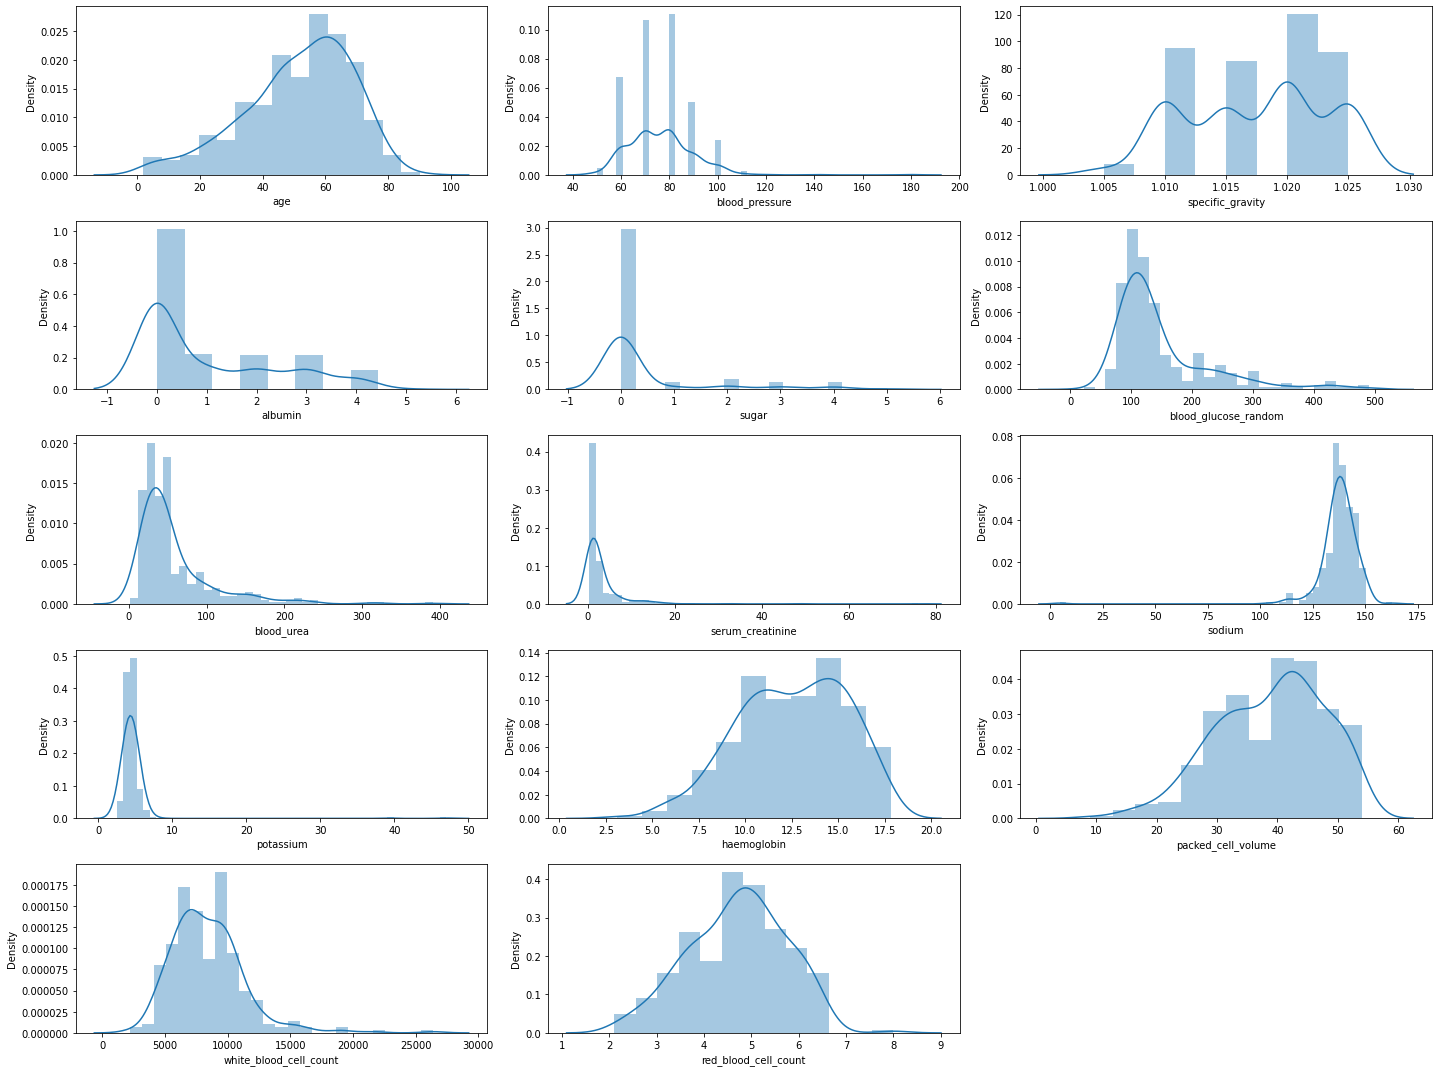

In [41]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,15))
plotnumber=1
for column in num_col:
    if plotnumber<=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(chronic_df[column])
        plt.xlabel(column)
        
    plotnumber += 1 
plt.tight_layout()
plt.show()   

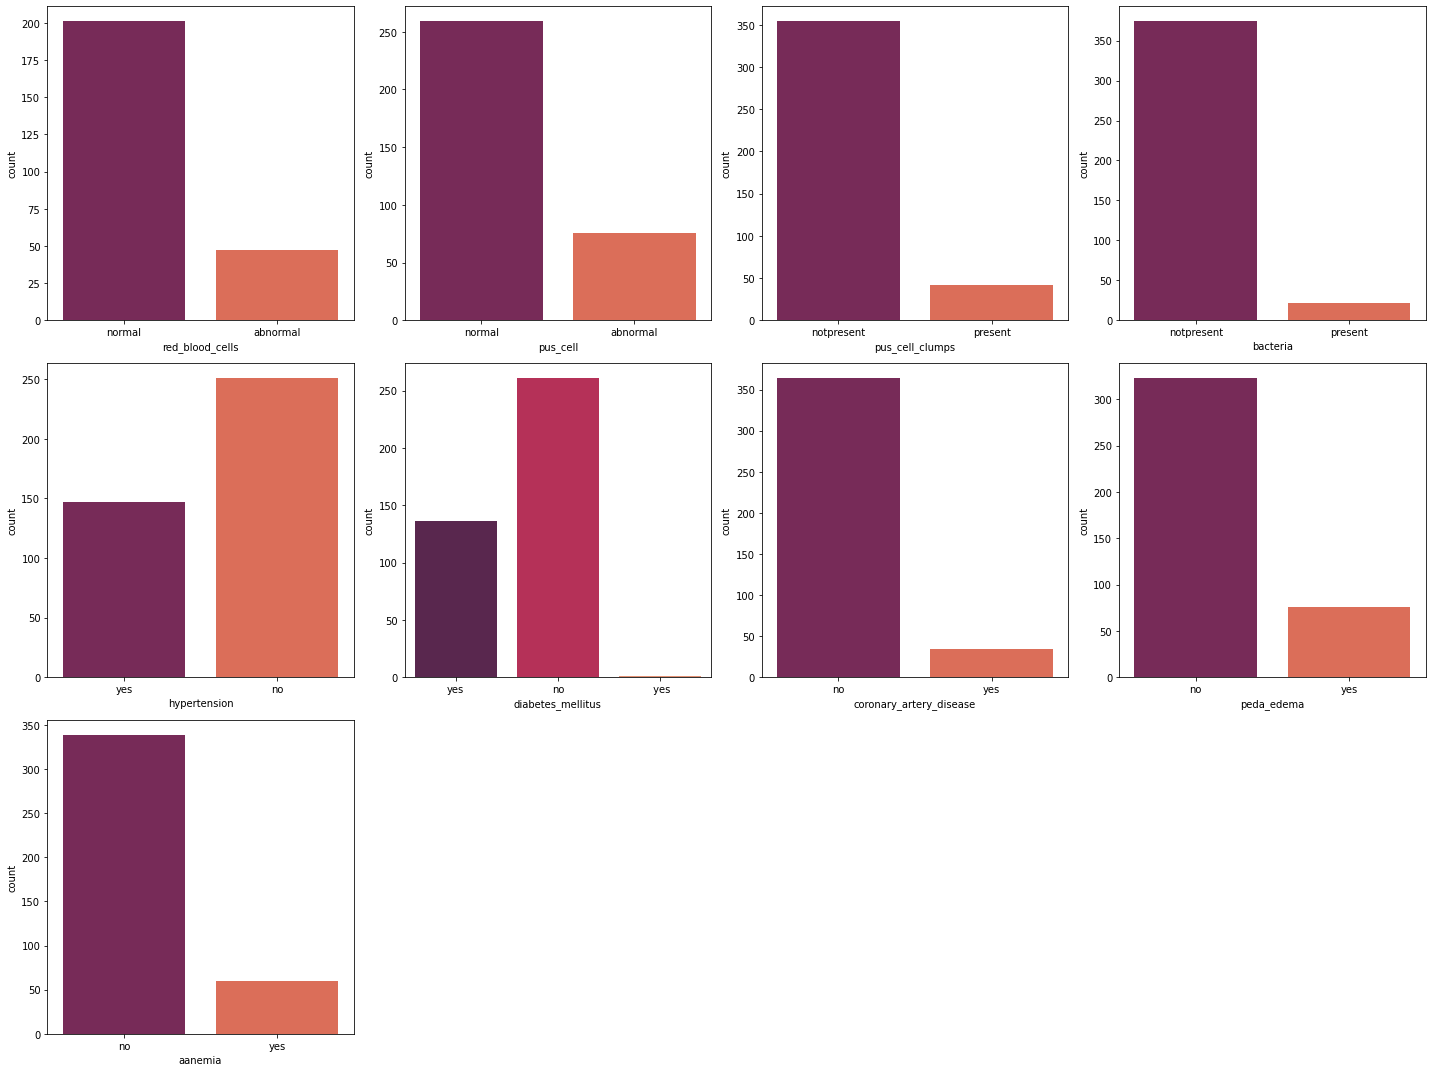

In [42]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_col:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(chronic_df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

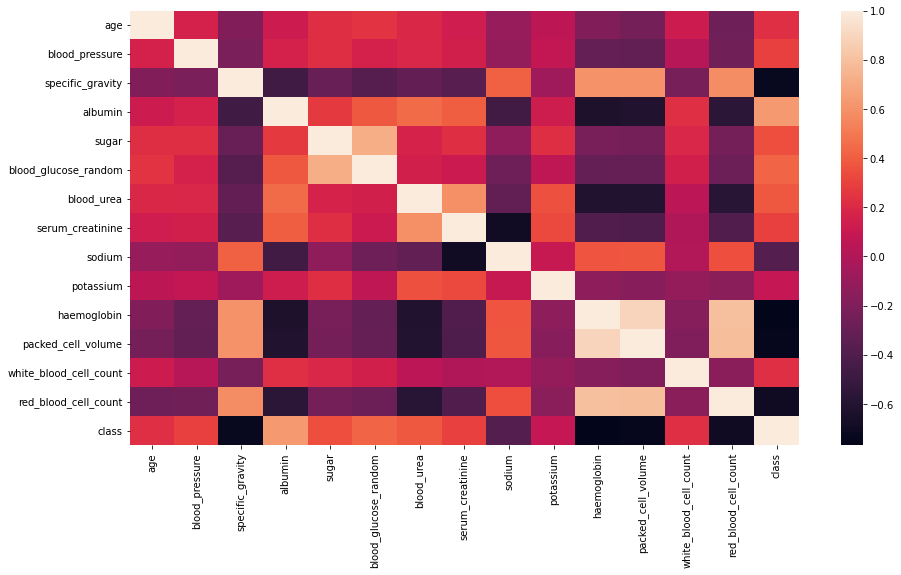

In [43]:
# heatmap of data

plt.figure(figsize = (15, 8))
sns.heatmap(chronic_df.corr())
plt.show()

In [44]:
chronic_df.corr()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,0.227268
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,0.294077
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,-0.732163
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,0.627090
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,0.344070
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,0.419672
blood_urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087,0.380605
serum_creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852,0.299969
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873,-0.375674
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309,0.084541


In [45]:
for features in num_col:
  mean=chronic_df[features].median()
  chronic_df[features]=chronic_df[features].fillna(mean)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf
variables = chronic_df[num_col]
vif = pd.DataFrame()
vif['VIF']=[vf(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif


,VIF,Features
0,11.574133,age
1,38.248217,blood_pressure
2,578.201629,specific_gravity
3,2.339346,albumin
4,2.088594,sugar
5,8.646517,blood_glucose_random
6,5.201858,blood_urea
7,3.086169,serum_creatinine
8,431.649889,sodium
9,4.592176,potassium


In [47]:

# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(chronic_df.corrwith(chronic_df['class'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

haemoglobin               0.726368
packed_cell_volume        0.673129
specific_gravity          0.659504
red_blood_cell_count      0.566163
albumin                   0.531562
blood_glucose_random      0.379321
blood_urea                0.369393
sodium                    0.334900
sugar                     0.294555
blood_pressure            0.293693
serum_creatinine          0.291245
age                       0.227842
white_blood_cell_count    0.177571
potassium                 0.065218
dtype: float64


In [48]:
for features in cat_col:
    mode = chronic_df[features].mode()[0]
    chronic_df[features] = chronic_df[features].fillna(mode)

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
for col in cat_col:
    chronic_df[col]=le.fit_transform(chronic_df[col])

In [50]:
# Importance of feature using Extra tree Regressor
from sklearn.ensemble import ExtraTreesRegressor
X = chronic_df.drop('class',axis =1)
y = chronic_df['class']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

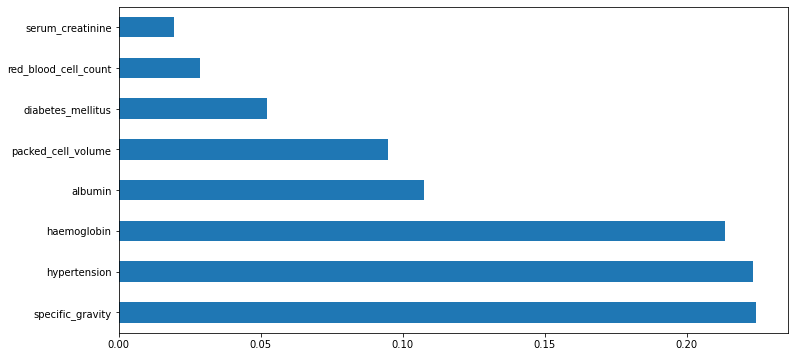

In [51]:
#plot feature importance, some visualization always help
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(8).plot(kind='barh')

In [52]:
chronic_df_new=chronic_df[['specific_gravity', 'albumin','serum_creatinine','haemoglobin','packed_cell_volume','red_blood_cell_count',  'hypertension', 'diabetes_mellitus','class']]

In [53]:
chronic_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   specific_gravity      400 non-null    float64
 1   albumin               400 non-null    float64
 2   serum_creatinine      400 non-null    float64
 3   haemoglobin           400 non-null    float64
 4   packed_cell_volume    400 non-null    float64
 5   red_blood_cell_count  400 non-null    float64
 6   hypertension          400 non-null    int64  
 7   diabetes_mellitus     400 non-null    int64  
 8   class                 400 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


In [54]:
chronic_df_new

,specific_gravity,albumin,serum_creatinine,haemoglobin,packed_cell_volume,red_blood_cell_count,hypertension,diabetes_mellitus,class
0,1.020,1.0,1.2,15.4,44.0,5.2,1,2,1
1,1.020,4.0,0.8,11.3,38.0,4.8,0,1,1
2,1.010,2.0,1.8,9.6,31.0,4.8,0,2,1
3,1.005,4.0,3.8,11.2,32.0,3.9,1,1,1
4,1.010,2.0,1.4,11.6,35.0,4.6,0,1,1
...,...,...,...,...,...,...,...,...,...
395,1.020,0.0,0.5,15.7,47.0,4.9,0,1,0
396,1.025,0.0,1.2,16.5,54.0,6.2,0,1,0
397,1.020,0.0,0.6,15.8,49.0,5.4,0,1,0
398,1.025,0.0,1.0,14.2,51.0,5.9,0,1,0


In [55]:
chronic_df_new.isnull().sum()

specific_gravity        0
albumin                 0
serum_creatinine        0
haemoglobin             0
packed_cell_volume      0
red_blood_cell_count    0
hypertension            0
diabetes_mellitus       0
class                   0
dtype: int64

In [60]:
X1=chronic_df_new.drop("class",axis=1)
Y1=chronic_df_new["class"]

In [61]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# X1 = pd.DataFrame(scaler.fit_transform(X1),columns=X1.columns)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(X1)
X1=pd.DataFrame(model.transform(X1))

In [62]:
X1.head()

,0,1,2,3,4,5,6,7
0,0.75,0.2,0.010582,0.836735,0.777778,0.525424,1.0,1.0
1,0.75,0.8,0.005291,0.557823,0.644444,0.457627,0.0,0.5
2,0.25,0.4,0.018519,0.442177,0.488889,0.457627,0.0,1.0
3,0.00,0.8,0.044974,0.551020,0.511111,0.305085,1.0,0.5
4,0.25,0.4,0.013228,0.578231,0.577778,0.423729,0.0,0.5


In [63]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.20, random_state = 0)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier()
knn.fit(X1_train, Y1_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(Y1_test, knn.predict(X1_test))

print(f"Training Accuracy of KNN is {accuracy_score(Y1_train, knn.predict(X1_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y1_test, knn.predict(X1_test))}\n")
print(f"Classification Report :- \n {classification_report(Y1_test, knn.predict(X1_test))}")

Training Accuracy of KNN is 0.990625
Test Accuracy of KNN is 0.9875 

Confusion Matrix :- 
[[28  0]
 [ 1 51]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [72]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 8, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 100)
rd_clf.fit(X1_train, Y1_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(Y1_test, rd_clf.predict(X1_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(Y1_train, rd_clf.predict(X1_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y1_test, rd_clf.predict(X1_test))}\n")
print(f"Classification Report :- \n {classification_report(Y1_test, rd_clf.predict(X1_test))}")




Training Accuracy of Random Forest Classifier is 0.996875
Test Accuracy of Random Forest Classifier is 1.0 

Confusion Matrix :- 
[[28  0]
 [ 0 52]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X1_train,Y1_train)
print('Training accuracy : ',model.score(X1_train,Y1_train))
print('Test accuracy : ',model.score(X1_test,Y1_test))

Training accuracy :  0.978125
Test accuracy :  0.9875


In [70]:
# import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=96)
ada.fit(X1_train,Y1_train)


# accuracy score, confusion matrix and classification report of ada boost


print("testing score",ada.score(X1_test,Y1_test))

testing score 1.0
